In [63]:
%matplotlib inline

import common
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [70]:
columns = ['start','end','country','countryISO','location','type','subtype','deaths','affected','damage','disasterid']
disaster_html = open('../data/disaster-table.html').read()
disasters = pd.read_html(disaster_html)[0]
disasters.columns = columns
disasters['duration'] = (raw_disasters['end'] - raw_disasters['start']) / np.timedelta64(1,'D')

In [71]:
disasters.dropna(subset=['duration'], inplace=True)
len(disasters)

398

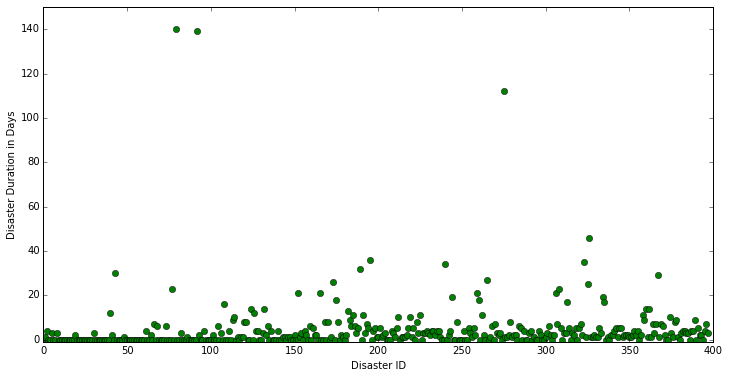

In [87]:
plt.plot(disasters['duration'], linestyle='', marker='o', color='g')
plt.ylim(-1, 150)
plt.xlabel('Disaster ID')
plt.ylabel('Disaster Duration in Days')

In [88]:
disasters = disasters[disasters['duration'] < 100]

In [153]:
len(disasters)

395

In [111]:
prices = pd.read_csv('../data/dow-2000-2014.csv', index_col='Date', parse_dates=True)[['Adjusted Close']]
prices.sort_index(inplace=True)
prices[:5]

,Adjusted Close
Date,
2000-01-03,11357.5
2000-01-04,10997.9
2000-01-05,11122.7
2000-01-06,11253.3
2000-01-07,11522.6


In [133]:
prices.ix[datetime(2000,2,26) : datetime(2000,2,29)]

,Adjusted Close
Date,
2000-02-28,10038.7
2000-02-29,10128.3


In [165]:
prices_non_disaster = prices.copy()

def price_change_between(start, end):
    start = start - np.timedelta64(1,'D')
    period_prices = prices.ix[start:end]
    prices_non_disaster.ix[start:end]['Adjusted Close'] = np.nan
    days_covered = len(period_prices)
    if days_covered == 0:
        return 0.0
    else:
        p1 = period_prices['Adjusted Close'][0]
        p2 = period_prices['Adjusted Close'][-1]    
        return (p2 - p1) / (p1 * days_covered)

for index, disaster in disasters.iterrows():
    disasters.loc[index, 'price_change'] = price_change_between(disaster['start'], disaster['end'])

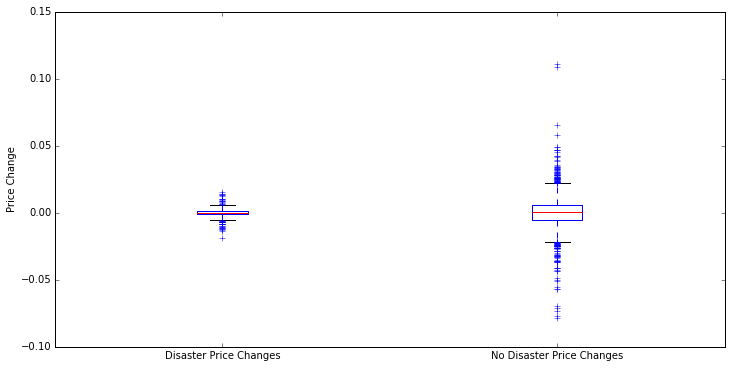

In [169]:
no_disaster_price_change = common.rdiff(prices_non_disaster['Adjusted Close'], 2).dropna()

plt.boxplot([disasters['price_change'], no_disaster_price_change], labels=['Disaster Price Changes', 'No Disaster Price Changes'])
plt.ylabel('Price Change')

In [172]:
from scipy.stats import ttest_ind

t, p = ttest_ind(disasters['price_change'], no_disaster_price_change)
t, p

(-0.47832261778701363, 0.63245805124608256)